<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/FinalCode/LIGOGlitchNoiseClassificationModelBuild_Iter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os
base_dir = "gdrive/My Drive/Colab Notebooks/GlitchNoiseClassification/"
seta = 'Glitch'
setb = 'Noise'

data_dir = os.path.join(base_dir, 'Data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

In [5]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from keras import regularizers
import numpy as np

Using TensorFlow backend.


In [0]:
setb_data_fnnames = np.delete(setb_data_fnnames, (762), axis=0)

In [0]:
seta_data_fnnames = np.delete(seta_data_fnnames, (1804), axis=0)

In [8]:
len(seta_data_fnnames)

1804

In [0]:
import numpy as np
import cv2
q1 = np.empty((1, 150, 150, 3))
q2 = np.empty((1, 150, 150, 3))
for a in range(1, len(seta_data_fnnames), 1):
  img_path_a = os.path.join(seta_data_dir, seta_data_fnnames[a])
  img_a = cv2.imread(os.path.join(seta_data_dir, seta_data_fnnames[a]))
  img_a = cv2.resize(img_a, (150, 150))
  q1 = np.vstack((q1, img_to_array(img_a).reshape(1, 150, 150, 3)))
  t1 = np.ones([len(seta_data_fnnames),1])
  
for b in range(1, len(setb_data_fnnames), 1):
  img_path_b = os.path.join(setb_data_dir, setb_data_fnnames[b])
  img_b = cv2.imread(os.path.join(setb_data_dir, setb_data_fnnames[b]))
  img_b = cv2.resize(img_b, (150, 150))
  q2 = np.vstack((q2, img_to_array(img_b).reshape(1, 150, 150, 3)))
  t2 = np.zeros([len(setb_data_fnnames),1])

In [0]:
t = np.vstack((t1, t2))
q = np.vstack((q1, q2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2435 samples, validate on 271 samples
Epoch 1/2
2435/2435 [==============================] - 453s 186ms/sample - loss: 3.3859 - acc: 0.9462 - val_loss: 1.1076e-07 - val_acc: 1.0000
Epoch 2/2
902/902 [==============================] - 40s 45ms/sample - loss: 0.0200 - acc: 0.9978
acc: 99.78%


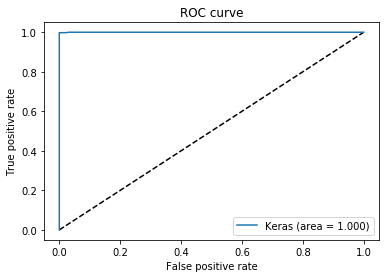

Confusion Matrix :
 [[1.         0.        ]
 [0.00443459 0.99556541]]
Classioficaton Report :
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       451
     class 1       1.00      1.00      1.00       451

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902

Precision score: 1.0
Recall score: 0.9955654101995566
f1_score : 0.9977777777777778
fbeta_score_0.5 : 0.9991099243435693
fbeta_score_1 : 0.9977777777777778
fbeta_score_2 : 0.9964491788726143
precision_recall_fscore_support : (array([0.99558499, 1.        ]), array([1.        , 0.99556541]), array([0.99646487, 0.99910992]), array([451, 451]))
Train on 2435 samples, validate on 271 samples
Epoch 1/2
2435/2435 [==============================] - 440s 181ms/sample - loss: 2.7876 - acc: 0.9639 - val_loss: 1.1164e-11 - val_acc: 1.0000
Epoch 2/2
902/902 [========================

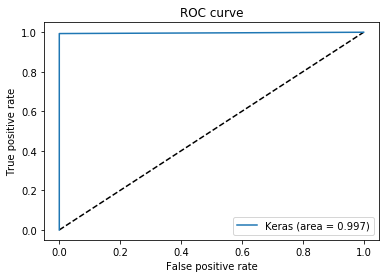

Confusion Matrix :
 [[1.         0.        ]
 [0.00886918 0.99113082]]
Classioficaton Report :
               precision    recall  f1-score   support

     class 0       0.99      1.00      1.00       451
     class 1       1.00      0.99      1.00       451

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902

Precision score: 1.0
Recall score: 0.991130820399113
f1_score : 0.9955456570155902
fbeta_score_0.5 : 0.998213488164359
fbeta_score_1 : 0.9955456570155902
fbeta_score_2 : 0.992892047978676
precision_recall_fscore_support : (array([0.99120879, 1.        ]), array([1.        , 0.99113082]), array([0.99295465, 0.99821349]), array([451, 451]))
Train on 2435 samples, validate on 271 samples
Epoch 1/2
2435/2435 [==============================] - 449s 184ms/sample - loss: 1.5746 - acc: 0.9561 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 2/2
902/902 [==============================]

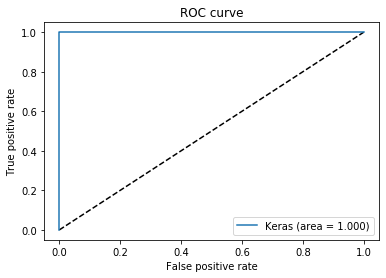

Confusion Matrix :
 [[1. 0.]
 [0. 1.]]
Classioficaton Report :
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       451
     class 1       1.00      1.00      1.00       451

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902

Precision score: 1.0
Recall score: 1.0
f1_score : 1.0
fbeta_score_0.5 : 1.0
fbeta_score_1 : 1.0
fbeta_score_2 : 1.0
precision_recall_fscore_support : (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([451, 451]))
Train on 2435 samples, validate on 271 samples
Epoch 1/2
2435/2435 [==============================] - 453s 186ms/sample - loss: 3.9612 - acc: 0.9458 - val_loss: 1.7293e-10 - val_acc: 1.0000
Epoch 2/2
902/902 [==============================] - 40s 45ms/sample - loss: 0.0677 - acc: 0.9978
acc: 99.78%


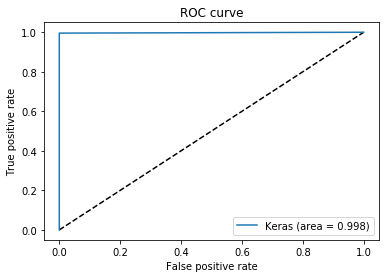

Confusion Matrix :
 [[1.         0.        ]
 [0.00443459 0.99556541]]
Classioficaton Report :
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       451
     class 1       1.00      1.00      1.00       451

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902

Precision score: 1.0
Recall score: 0.9955654101995566
f1_score : 0.9977777777777778
fbeta_score_0.5 : 0.9991099243435693
fbeta_score_1 : 0.9977777777777778
fbeta_score_2 : 0.9964491788726143
precision_recall_fscore_support : (array([0.99558499, 1.        ]), array([1.        , 0.99556541]), array([0.99646487, 0.99910992]), array([451, 451]))
99.78% (+/- 0.16%)


In [12]:
#Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import regularizers
import tensorflow as tf
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

from sklearn.model_selection import StratifiedKFold

# define 4-fold cross validation test harness
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(q, t):

  # create model
  img_input = layers.Input(shape=(150, 150, 3))

  # 2D Conv Layer with 64 filters of dimension 3x3 and ReLU activation function
  x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
  # 2D Max Pooling Layer
  x = layers.MaxPooling2D(2)(x)

  # 2D Conv Layer with 128 filters of dimension 3x3 and ReLU activation function
  x = layers.Conv2D(128, 3, activation = 'relu')(x)
  # 2D Max Pooling Layer
  x = layers.MaxPooling2D(2)(x)

  # 2D Conv Layer with 256 filters of dimension 3x3 and ReLU activation function
  x = layers.Conv2D(256, 3, activation = 'relu')(x)
  # 2D Max Pooling Layer
  x = layers.MaxPooling2D(2)(x)

  # 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
  x = layers.Conv2D(512, 3, activation = 'relu')(x)
  # 2D Max Pooling Layer
  x = layers.MaxPooling2D(2)(x)

  # 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
  x = layers.Conv2D(512, 3, activation = 'relu')(x)

  # Faltten Layer
  x = layers.Flatten()(x)

  # Fully Connected Layers and ReLU activation algoritm
  #x = layers.Dense(4096, activation = 'relu')(x)
  x = layers.Dense(4096, activation = 'relu')(x)
  x = layers.Dense(1000, activation = 'relu')(x)

  # Dropout Layer for Optimization
  x = layers.Dropout(0.5,noise_shape=None, seed=None)(x)

  # Fully connected layers and sigmoid activation algorithm
  output = layers.Dense(1, activation = 'sigmoid')(x)

  model = Model(img_input, output)
  
  # Compile model
  model.compile(loss = 'binary_crossentropy', optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005), metrics = ['accuracy'])
  # Fit the model
  #model.fit(q[train], t[train], epochs=2, batch_size=32, verbose=1)
  history = model.fit(q[train], t[train], epochs=2, batch_size=32, validation_split=0.1, verbose = 1, shuffle=True)
  # evaluate the model
  scores = model.evaluate(q[test], t[test], verbose=1)
  
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  
  y_pred = model.predict(q[test])
  fpr, tpr, thresholds = roc_curve(t[test], y_pred, pos_label=None)
  from sklearn.metrics import auc
  auc = auc(fpr, tpr)

  nsamples, nx, ny, nz = q[train].shape
  nsamplesx, nxx, nyx, nzx = q[test].shape
  train_dataset = q[train].reshape((nsamples,nx*ny*nz))
  test_dataset = q[test].reshape((nsamplesx,nxx*nyx*nzx))


  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()
  
  accuracy_score(t[test],  y_pred.round(), normalize=True, sample_weight=None)
  hamming_loss(t[test], y_pred.round())
  cm = confusion_matrix(t[test], y_pred.round())
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print('Confusion Matrix :\n', cm)
  target_names = ['class 0', 'class 1']
  print('Classioficaton Report :\n', classification_report(t[test], y_pred.round(), target_names=target_names))
  print('Precision score:', metrics.precision_score(t[test], y_pred.round()))
  print('Recall score:', metrics.recall_score(t[test], y_pred.round()))
  print('f1_score :', metrics.f1_score(t[test], y_pred.round()))  
  print('fbeta_score_0.5 :', metrics.fbeta_score(t[test], y_pred.round(), beta=0.5))
  print('fbeta_score_1 :', metrics.fbeta_score(t[test], y_pred.round(), beta=1)) 
  print('fbeta_score_2 :', metrics.fbeta_score(t[test], y_pred.round(), beta=2)) 
  print('precision_recall_fscore_support :', metrics.precision_recall_fscore_support(t[test], y_pred.round(), beta=0.5))

 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(q, t, test_size=0.2, shuffle=True)

In [13]:
y_pred[53]

array([1.], dtype=float32)

In [14]:
array_to_img(cv2.resize(X_test[53], (300, 300)))

NameError: ignored

In [0]:
import numpy as np
cal_glitch = 0
cal_noise = 0
cal_unconclusive = 0

alist=[]
for fname in seta_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(seta_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]>0.5):
        cal_glitch+=1
    elif(pred_img[0]<0.5):
        cal_noise+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
#print(alist)

print("Identified as: \n")
print("Glitch :", cal_glitch)
print("Noise :", cal_noise)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_glitch/(cal_glitch+cal_unconclusive+cal_noise))*100)
a = (cal_glitch/(cal_glitch+cal_unconclusive+cal_noise))*100

Identified as: 

Glitch : 1803
Noise : 1
Inconclusive : 0
Percentage : 99.94456762749445


In [30]:
import numpy as np
cal_glitch = 0
cal_noise = 0
cal_unconclusive = 0

alist=[]
for fname in setb_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(setb_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]<0.5):
        cal_noise+=1
    elif(pred_img[0]>0.5):
        cal_glitch+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
#print(alist)

print("Identified as: \n")
print("Glitch :", cal_glitch)
print("Noise :", cal_noise)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_noise/(cal_glitch+cal_unconclusive+cal_noise))*100)
a = (cal_noise/(cal_glitch+cal_unconclusive+cal_noise))*100

Identified as: 

Glitch : 0
Noise : 1804
Inconclusive : 0
Percentage : 100.0
